In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
sc = pd.read_csv('streetcar-data.csv')

In [9]:
sc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,1-Jan-24,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,1-Jan-24,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,1-Jan-24,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,1-Jan-24,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,1-Jan-24,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
13103,30-Nov-24,501,22:53,Saturday,QUEEN AND UNIVERSITY,Diversion,88,98,NaN,4514
13104,30-Nov-24,511,23:57,Saturday,GERRARD AND HAMILTON,Collision - TTC Involved,0,0,E,4466
13105,30-Nov-24,505,23:57,Saturday,DUNDAS AND JARVIS,Diversion,10,20,E,4575
13106,30-Nov-24,501,00:42,Saturday,QUEEN AND STRACHAN,Cleaning - Unsanitary,10,20,W,4629


In [10]:
# Check missing data
sc.isnull().sum()

Date            0
Line          145
Time            0
Day             0
Location        1
Incident        0
Min Delay       0
Min Gap         0
Bound        1921
Vehicle         0
dtype: int64

In [34]:
# Data Cleaning
sc.dropna(axis=0, inplace=True)
# No Streetcar for that specific event
sc = sc[sc["Bound"] != '8']
# Get the count of each location
location_counts = sc["Location"].value_counts()

# Filter locations that occur more than once
locations_to_keep = location_counts[location_counts > 1].index

# Filter the dataframe to keep only rows with locations that occur more than once
sc = sc[sc["Location"].isin(locations_to_keep)]

sc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,1-Jan-24,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,1-Jan-24,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,1-Jan-24,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,1-Jan-24,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,1-Jan-24,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
13102,30-Nov-24,506,21:46,Saturday,HOWARD PARK AND RONCES,Emergency Services,33,43,E,4415
13104,30-Nov-24,511,23:57,Saturday,GERRARD AND HAMILTON,Collision - TTC Involved,0,0,E,4466
13105,30-Nov-24,505,23:57,Saturday,DUNDAS AND JARVIS,Diversion,10,20,E,4575
13106,30-Nov-24,501,00:42,Saturday,QUEEN AND STRACHAN,Cleaning - Unsanitary,10,20,W,4629


Delays occurred in a day

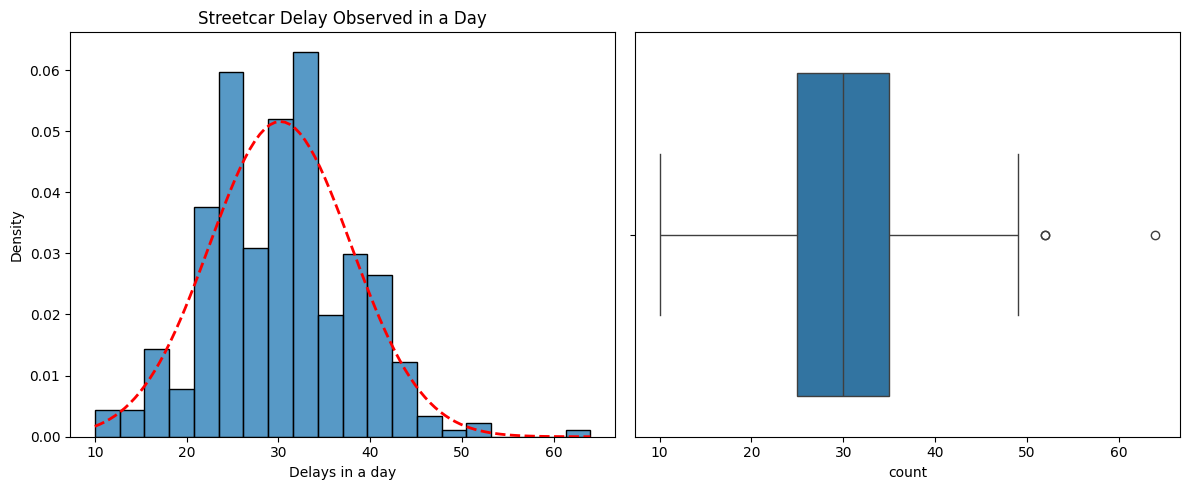

In [12]:
sc_date_counts = sc['Date'].value_counts()
# Fit a normal distribution
mu, sigma = np.mean(sc_date_counts), np.std(sc_date_counts)
x = np.linspace(min(sc_date_counts), max(sc_date_counts), 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot histogram with normal distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay counts
sns.histplot(sc_date_counts, ax=ax[0], bins=20, kde=False, stat="density")
ax[0].plot(x, y, color='red', linestyle='dashed', linewidth=2)  # Normal distribution line
ax[0].set_xlabel("Delays in a day")
ax[0].set_ylabel("Density")
ax[0].set_title("Streetcar Delay Observed in a Day")

# Boxplot
sns.boxplot(x=sc_date_counts, ax=ax[1])

plt.tight_layout()
plt.show()

Delays in minutes

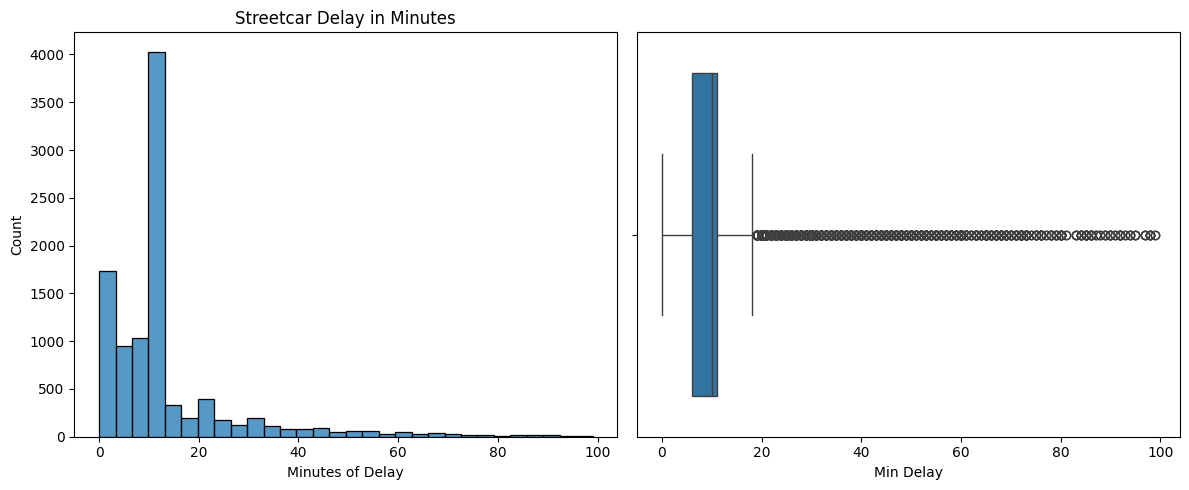

In [13]:
# Filter out extreme delays (keeping <100 minutes)
filtered_delays = sc[sc['Min Delay'] < 100]['Min Delay']

# Plot histogram and boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay times
sns.histplot(filtered_delays, ax=ax[0], bins=30, kde=False, stat="count")
ax[0].set_xlabel("Minutes of Delay")
ax[0].set_ylabel("Count")
ax[0].set_title("Streetcar Delay in Minutes")

# Boxplot
sns.boxplot(x=filtered_delays, ax=ax[1])

plt.tight_layout()
plt.show()


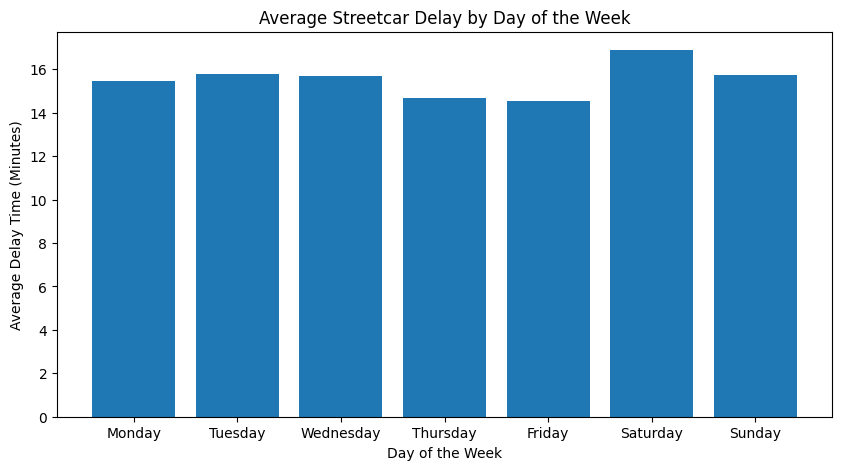

In [14]:
# Calculate average delay per day
avg_delay_per_day = sc.groupby("Day")["Min Delay"].mean()

# Ensure days are in correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_delay_per_day = avg_delay_per_day.reindex(day_order)  # Reorder index

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_day.index, avg_delay_per_day.values) 

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Day of the Week")
#plt.xticks(rotation=45) 
plt.show()

In [35]:
sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False) 
sc["Month"] = sc["Date"].dt.strftime("%B")

C:\Users\Elowe\AppData\Local\Temp\ipykernel_41936\627174662.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False)


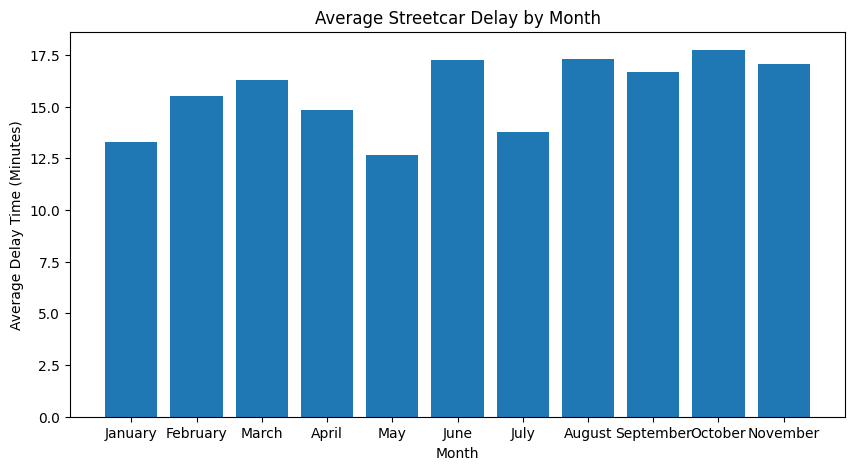

In [16]:
# Define month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Group by month and calculate average delay
avg_delay_per_month = sc.groupby("Month")["Min Delay"].mean().reindex(month_order) 

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_month.index, avg_delay_per_month.values) 

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Month")
plt.show()

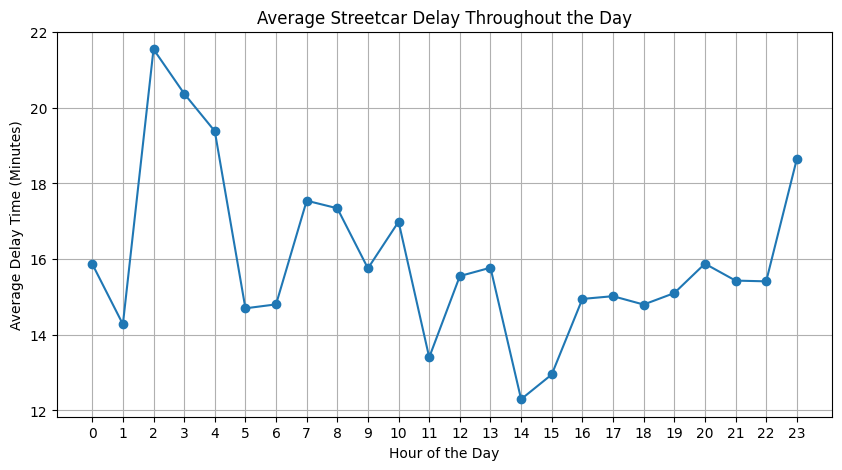

In [36]:
sc["Hour"] = sc["Time"].str[:2].astype(int)
# Group by 'Hour' and calculate the average delay time
avg_delay_per_hour = sc.groupby("Hour")["Min Delay"].mean()

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(avg_delay_per_hour.index, avg_delay_per_hour.values, marker="o", linestyle="-")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay Throughout the Day")
plt.xticks(range(0, 24))  # Ensure all hours (0-23) appear on the x-axis
plt.grid(True)  # Add grid for better readability

plt.show()

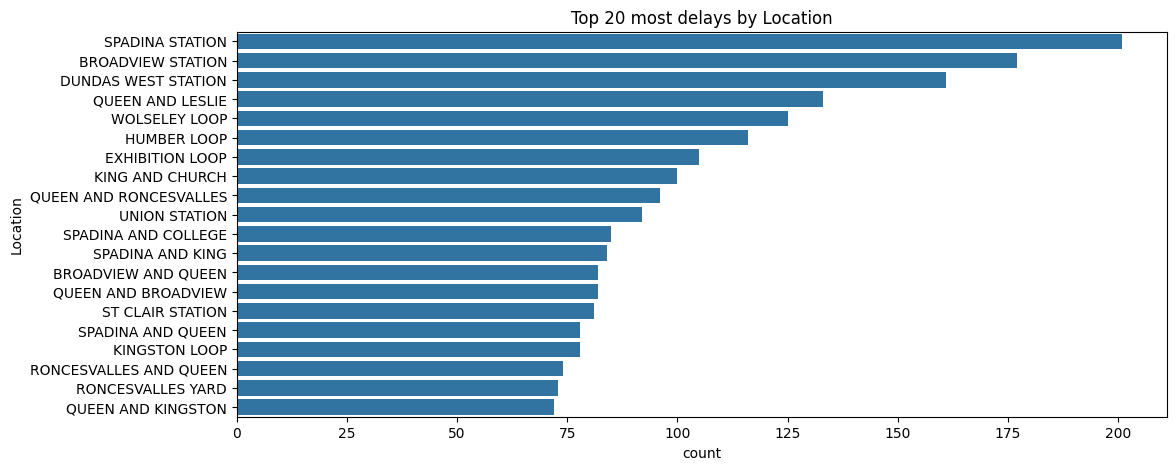

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Location'], order= sc['Location'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Location");

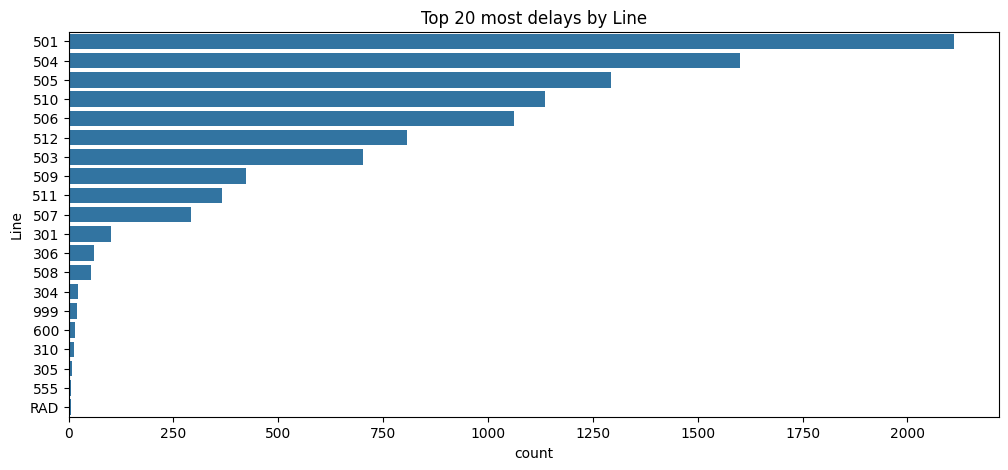

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Line'], order= sc['Line'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Line");

C:\Users\Elowe\AppData\Local\Temp\ipykernel_41936\1589882477.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);


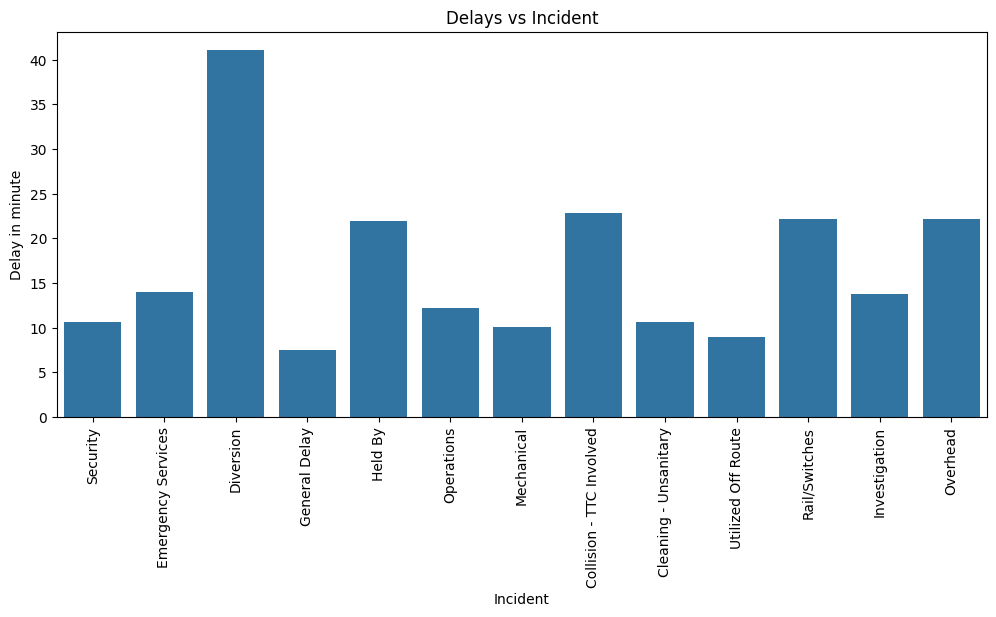

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Incident")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");
plt.xticks(rotation=90);

C:\Users\Elowe\AppData\Local\Temp\ipykernel_41936\1490277223.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);


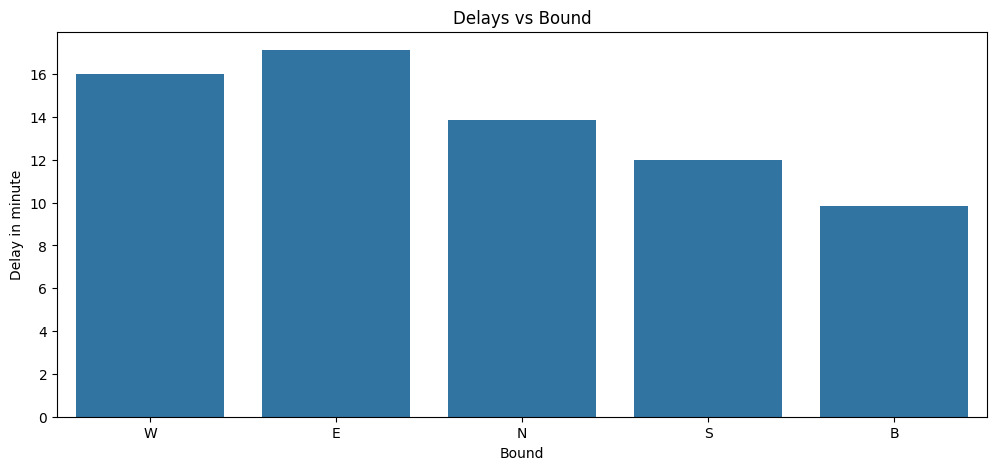

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Bound")
plt.xlabel("Bound")
plt.ylabel("Delay in minute");

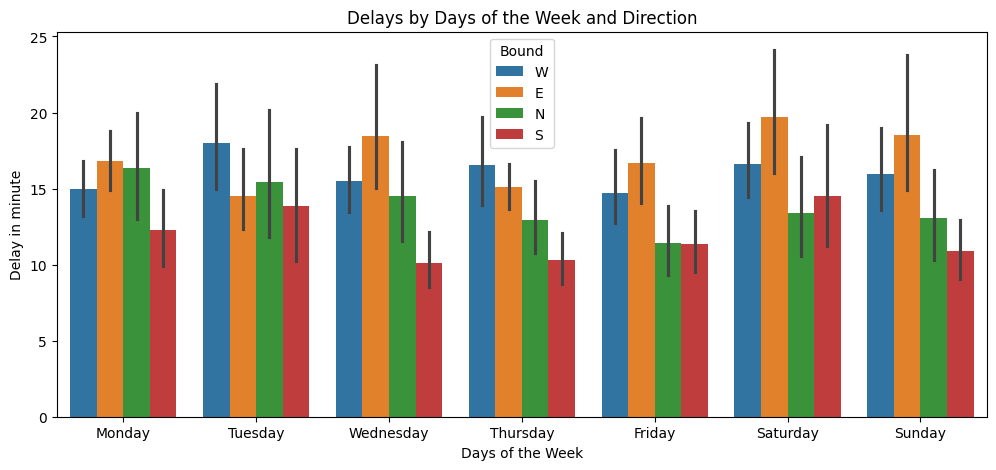

In [22]:
sc_no_B = sc[sc['Bound']!='B']
plt.figure(figsize=(12,5))
sns.barplot(x='Day', y='Min Delay',hue='Bound', data=sc_no_B);
plt.title("Delays by Days of the Week and Direction")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
sc['Day_encoded'] = sc['Day'].map(day_map)
bound_map = {
    'E':0,
    'S':1,
    'W':2,
    'N':3
}
sc['Bound_encoded'] = sc['Bound'].map(bound_map)
most_delayed_lines = sc['Line'].value_counts().head(20)
sc['most_delayed_line'] = sc['Line'].map(lambda x: most_delayed_lines.get(x, 0))

In [75]:
sc_new = pd.get_dummies(sc, columns=['Location', 'Incident'], drop_first=True)
less_30 = sc_new[sc_new['Min Delay'] <= 30]
greater_30 = sc_new[sc_new['Min Delay'] > 30]
X1 = less_30.drop(['Min Delay','Day','Date','Month','Time','Bound','Vehicle','Line'], axis=1) 
y1 = less_30['Min Delay']

In [76]:
X1

,Min Gap,Hour,Day_encoded,Bound_encoded,most_delayed_line,Location_60 PLEASANT BLVD,Location_ADELAIDE AND CHURCH,Location_AVENUE AND ST CLAIR,Location_BATHURST AND ADELAIDE,Location_BATHURST AND BLOOR,...,Incident_Emergency Services,Incident_General Delay,Incident_Held By,Incident_Investigation,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,20,2,0,2.0,1294,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,3,0,3.0,703,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,18,4,0,0.0,292,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,28,4,0,0.0,1062,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,30,4,0,2.0,2112,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13101,20,20,5,3.0,1136,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13104,0,23,5,0.0,366,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13105,20,23,5,0.0,1294,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13106,20,0,5,2.0,2112,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [78]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
mae = mean_absolute_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

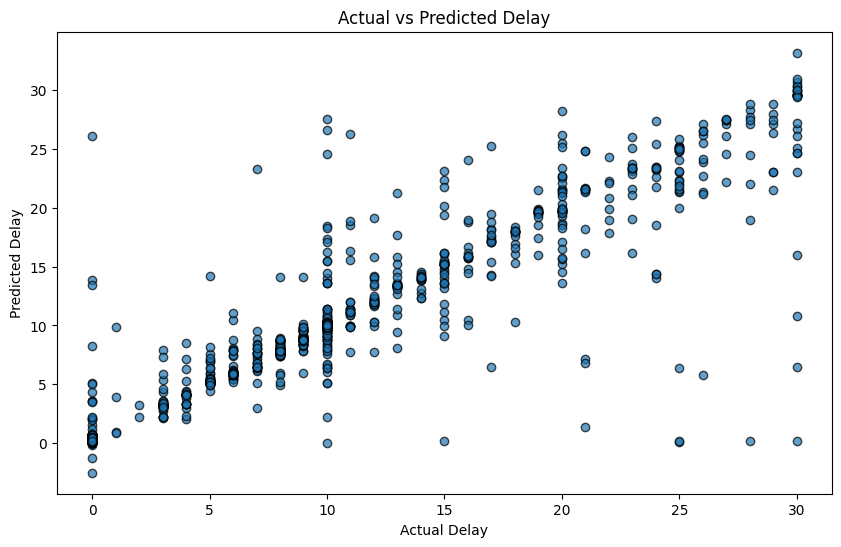

In [80]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, alpha=0.7, edgecolors='k')
#plt.plot([0, max(y1_test)], [0, max(y1_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay")
plt.show()

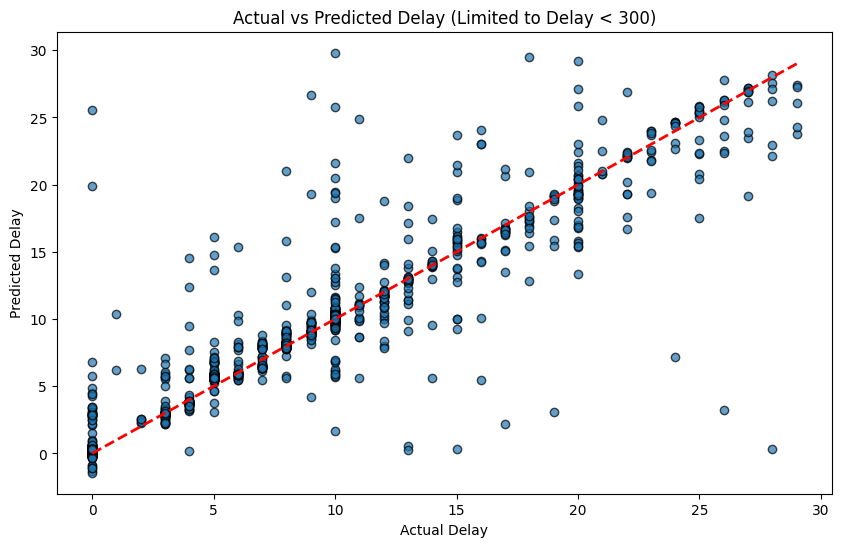

In [63]:
# Filter the actual and predicted values to include only delays less than 300
mask = (y_test < 30) & (y_pred < 30)

# Apply the mask to the actual and predicted values
filtered_y_test = y_test[mask]
filtered_y_pred = y_pred[mask]

# Plotting Actual vs Predicted (Filtered to delays < 300)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_y_test, filtered_y_pred, alpha=0.7, edgecolors='k')
plt.plot([0, max(filtered_y_test)], [0, max(filtered_y_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay (Limited to Delay < 300)")
plt.show()